In [1]:
import pandas as pd
from pathlib import Path
import pandas_datareader.data as reader
import datetime as dt
from MCForecastTools import MCSimulation

# For visualizations:
import seaborn as sns

# PART I: DATA CAPTURE AND ORGANIZATION

In [2]:
end = dt.date(2022, 5, 9)
start = dt.date(2021, 5, 9)

ticker1 = ["BTC-USD"]
ticker2 = ["IWP"]  #iShares Russell Mid-Cap GROWTH ETF, a midcap growth fund. Chose midcap to factor out size.
ticker3 = ["IWS"]  #iShares Russell Mid-Cap VALUE ETF, a midcap value fund. Chose midcap to factor out size.
ticker4 = ["MGC"]   #Vanguard Mega Cap ETF, a fund with LARGE CAPS only to feature size (large cap end of the spectrum).
ticker5 = ["IWC"]  #iShares Micro-Cap ETF, a fund with SMALL CAPS only to feature size (small cap end of the spectrum).

In [3]:
# Get BTC closing prices

btc_prices = reader.get_data_yahoo(ticker1, start, end)
display(btc_prices.head())
btc_prices.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2021-05-09,58232.316406,58232.316406,59210.882812,56482.003906,58877.390625,65906690347
2021-05-10,55859.796875,55859.796875,59519.355469,54071.457031,58250.871094,71776546298
2021-05-11,56704.574219,56704.574219,56872.542969,54608.652344,55847.242188,61308396325
2021-05-12,49150.535156,49150.535156,57939.363281,49150.535156,56714.531250,75215403907
2021-05-13,49716.191406,49716.191406,51330.843750,46980.019531,49735.433594,96721152926


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2022-05-06,36040.921875,36040.921875,36624.359375,35482.132812,36573.183594,37795577489
2022-05-07,35501.953125,35501.953125,36129.925781,34940.824219,36042.503906,24375896406
2022-05-08,34059.265625,34059.265625,35502.941406,33878.964844,35502.941406,36763041910
2022-05-09,30296.953125,30296.953125,34222.074219,30296.953125,34060.015625,63355494961
2022-05-10,30547.013672,30547.013672,32561.984375,29961.925781,30405.373047,58887413760


In [4]:
btc_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
btc_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2021-05-09,58232.316406,58232.316406,59210.882812,56482.003906,58877.390625,65906690347
2021-05-10,55859.796875,55859.796875,59519.355469,54071.457031,58250.871094,71776546298
2021-05-11,56704.574219,56704.574219,56872.542969,54608.652344,55847.242188,61308396325
2021-05-12,49150.535156,49150.535156,57939.363281,49150.535156,56714.531250,75215403907
2021-05-13,49716.191406,49716.191406,51330.843750,46980.019531,49735.433594,96721152926


In [5]:
btc_prices = btc_prices[["open", "high", "low", "close", "volume", "adj close"]]
btc_prices.drop(columns="adj close", axis=1, inplace=True)
btc_prices.head()

,open,high,low,close,volume
Date,,,,,
2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,65906690347
2021-05-10,58250.871094,59519.355469,54071.457031,55859.796875,71776546298
2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,61308396325
2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,75215403907
2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,96721152926


In [6]:
iwp_prices = reader.get_data_yahoo(ticker2, start, end)
display(iwp_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWP,IWP,IWP,IWP,IWP,IWP
Date,,,,,,
2021-05-10,102.304337,102.690002,104.349998,102.669998,104.349998,1034100.0
2021-05-11,102.413918,102.800003,103.099998,100.389999,100.800003,1623600.0
2021-05-12,99.604515,99.980003,102.050003,99.839996,101.820000,1905500.0
2021-05-13,99.843605,100.220001,101.400002,99.269997,100.480003,2649500.0
2021-05-14,102.164864,102.550003,102.779999,100.860001,101.050003,631500.0


In [7]:
iwp_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
iwp_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2021-05-10,102.304337,102.690002,104.349998,102.669998,104.349998,1034100.0
2021-05-11,102.413918,102.800003,103.099998,100.389999,100.800003,1623600.0
2021-05-12,99.604515,99.980003,102.050003,99.839996,101.820000,1905500.0
2021-05-13,99.843605,100.220001,101.400002,99.269997,100.480003,2649500.0
2021-05-14,102.164864,102.550003,102.779999,100.860001,101.050003,631500.0


In [8]:
iwp_prices = iwp_prices[["open", "high", "low", "close", "volume", "adj close"]]
iwp_prices.drop(columns="adj close", axis=1, inplace=True)
iwp_prices.head()

,open,high,low,close,volume
Date,,,,,
2021-05-10,104.349998,104.349998,102.669998,102.690002,1034100.0
2021-05-11,100.800003,103.099998,100.389999,102.800003,1623600.0
2021-05-12,101.820000,102.050003,99.839996,99.980003,1905500.0
2021-05-13,100.480003,101.400002,99.269997,100.220001,2649500.0
2021-05-14,101.050003,102.779999,100.860001,102.550003,631500.0


In [9]:
iws_prices = reader.get_data_yahoo(ticker3, start, end)
display(iws_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWS,IWS,IWS,IWS,IWS,IWS
Date,,,,,,
2021-05-10,114.984444,116.730003,118.330002,116.730003,117.620003,380200.0
2021-05-11,113.605377,115.330002,116.099998,114.279999,115.290001,368300.0
2021-05-12,110.551735,112.230003,115.400002,112.199997,114.970001,432400.0
2021-05-13,112.462715,114.169998,114.580002,112.379997,112.379997,564500.0
2021-05-14,114.245659,115.980003,116.250000,114.720001,114.900002,392200.0


In [10]:
iws_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
iws_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2021-05-10,114.984444,116.730003,118.330002,116.730003,117.620003,380200.0
2021-05-11,113.605377,115.330002,116.099998,114.279999,115.290001,368300.0
2021-05-12,110.551735,112.230003,115.400002,112.199997,114.970001,432400.0
2021-05-13,112.462715,114.169998,114.580002,112.379997,112.379997,564500.0
2021-05-14,114.245659,115.980003,116.250000,114.720001,114.900002,392200.0


In [11]:
iws_prices = iws_prices[["open", "high", "low", "close", "volume", "adj close"]]
iws_prices.drop(columns="adj close", axis=1, inplace=True)
iws_prices.head()

,open,high,low,close,volume
Date,,,,,
2021-05-10,117.620003,118.330002,116.730003,116.730003,380200.0
2021-05-11,115.290001,116.099998,114.279999,115.330002,368300.0
2021-05-12,114.970001,115.400002,112.199997,112.230003,432400.0
2021-05-13,112.379997,114.580002,112.379997,114.169998,564500.0
2021-05-14,114.900002,116.250000,114.720001,115.980003,392200.0


In [12]:
mgc_prices = reader.get_data_yahoo(ticker4, start, end)
display(mgc_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MGC,MGC,MGC,MGC,MGC,MGC
Date,,,,,,
2021-05-10,145.630539,147.500000,149.259995,147.440002,149.259995,95000.0
2021-05-11,144.505020,146.360001,146.529999,144.889999,145.580002,316600.0
2021-05-12,141.493637,143.309998,145.699997,143.050003,145.179993,151000.0
2021-05-13,142.964783,144.800003,145.539993,143.820007,143.820007,108000.0
2021-05-14,145.245483,147.110001,147.380005,146.000000,146.000000,93600.0


In [13]:
mgc_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
mgc_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2021-05-10,145.630539,147.500000,149.259995,147.440002,149.259995,95000.0
2021-05-11,144.505020,146.360001,146.529999,144.889999,145.580002,316600.0
2021-05-12,141.493637,143.309998,145.699997,143.050003,145.179993,151000.0
2021-05-13,142.964783,144.800003,145.539993,143.820007,143.820007,108000.0
2021-05-14,145.245483,147.110001,147.380005,146.000000,146.000000,93600.0


In [14]:
mgc_prices = mgc_prices[["open", "high", "low", "close", "volume", "adj close"]]
mgc_prices.drop(columns="adj close", axis=1, inplace=True)
mgc_prices.head()

,open,high,low,close,volume
Date,,,,,
2021-05-10,149.259995,149.259995,147.440002,147.500000,95000.0
2021-05-11,145.580002,146.529999,144.889999,146.360001,316600.0
2021-05-12,145.179993,145.699997,143.050003,143.309998,151000.0
2021-05-13,143.820007,145.539993,143.820007,144.800003,108000.0
2021-05-14,146.000000,147.380005,146.000000,147.110001,93600.0


In [15]:
iwc_prices = reader.get_data_yahoo(ticker5, start, end)
display(iwc_prices.head())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,IWC,IWC,IWC,IWC,IWC,IWC
Date,,,,,,
2021-05-10,140.239044,141.279999,145.990005,141.100006,145.869995,112400.0
2021-05-11,140.248978,141.289993,141.949997,136.690002,137.440002,70300.0
2021-05-12,135.940964,136.949997,141.080002,136.539993,140.139999,90200.0
2021-05-13,137.499390,138.520004,140.580002,135.649994,137.759995,221000.0
2021-05-14,141.400436,142.449997,142.669998,139.089996,139.979996,56100.0


In [16]:
iwc_prices.columns = ["adj close", "close", "high", "low", "open", "volume"]
iwc_prices.head()

,adj close,close,high,low,open,volume
Date,,,,,,
2021-05-10,140.239044,141.279999,145.990005,141.100006,145.869995,112400.0
2021-05-11,140.248978,141.289993,141.949997,136.690002,137.440002,70300.0
2021-05-12,135.940964,136.949997,141.080002,136.539993,140.139999,90200.0
2021-05-13,137.499390,138.520004,140.580002,135.649994,137.759995,221000.0
2021-05-14,141.400436,142.449997,142.669998,139.089996,139.979996,56100.0


In [17]:
iwc_prices = iwc_prices[["open", "high", "low", "close", "volume", "adj close"]]
iwc_prices.drop(columns="adj close", axis=1, inplace=True)
iwc_prices.head()

,open,high,low,close,volume
Date,,,,,
2021-05-10,145.869995,145.990005,141.100006,141.279999,112400.0
2021-05-11,137.440002,141.949997,136.690002,141.289993,70300.0
2021-05-12,140.139999,141.080002,136.539993,136.949997,90200.0
2021-05-13,137.759995,140.580002,135.649994,138.520004,221000.0
2021-05-14,139.979996,142.669998,139.089996,142.449997,56100.0


In [18]:
# Concatenate the ticker DataFrames
prices_btc_iwp = pd.concat([btc_prices, iwp_prices], axis=1, keys=["BTC-USD", "IWP"])
prices_btc_iws = pd.concat([btc_prices, iws_prices], axis=1, keys=["BTC-USD", "IWS"])
prices_btc_mgc = pd.concat([btc_prices, mgc_prices], axis=1, keys=["BTC-USD", "MGC"])
prices_btc_iwc = pd.concat([btc_prices, iwc_prices], axis=1, keys=["BTC-USD", "IWC"])

prices_btc_iwp = prices_btc_iwp.dropna()
prices_btc_iws = prices_btc_iws.dropna()
prices_btc_mgc = prices_btc_mgc.dropna()
prices_btc_iwc = prices_btc_iwc.dropna()

display(prices_btc_iwp.tail())
display(prices_btc_iws.tail())
display(prices_btc_mgc.tail())
prices_btc_iwc.tail()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125   
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   

                               IWP                                              
                 volume       open       high        low      close     volume  
Date                                                                            
2022-05-03  27326943244  90.099998  90.949997  89.570000  90.160004   951500.0  
2022-05-04  36754404490  90.230003  92.779999  88.239998  92.660004  1767500.0  
2022-05-05  43106256317  91.639999  91.639999  87.150002  88.150002  1536100.0  
2022-05-06  37795577489  87.489998  87.489998  84.419998  85.919998  3168000.0  
2022-05-09  63355494961  84.339996  84.680000  80.820000  81.209999  3072000.0

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125   
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   

                                IWS                                      \
                 volume        open        high         low       close   
Date                                                                      
2022-05-03  27326943244  112.790001  114.629997  112.790001  113.959999   
2022-05-04  36754404490  114.190002  117.099998  113.209999  116.970001   
2022-05-05  43106256317  116.000000  116.279999  112.519997  113.519997   
2022-05-06  37795577489  113.040001  113.370003  111.099998  112.620003   
2022-05-09  63355494961  111.320000  111.519997  108.639999  109.000000   

                       
               volume  
Date                   
2022-05-03   603400.0  
2022-05-04   981300.0  
2022-05-05   527400.0  
2022-05-06  1243800.0  
2022-05-09   907000.0

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125   
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   

                                MGC                                      \
                 volume        open        high         low       close   
Date                                                                      
2022-05-03  27326943244  145.119995  146.470001  144.570007  145.630005   
2022-05-04  36754404490  145.919998  150.270004  144.600006  149.990005   
2022-05-05  43106256317  148.360001  148.429993  143.000000  144.419998   
2022-05-06  37795577489  143.600006  144.910004  141.610001  143.690002   
2022-05-09  63355494961  141.369995  141.669998  138.369995  138.960007   

                      
              volume  
Date                  
2022-05-03  248000.0  
2022-05-04  346500.0  
2022-05-05  243100.0  
2022-05-06  237200.0  
2022-05-09  285400.0

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125   
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-09  34060.015625  34222.074219  30296.953125  30296.953125   

                                IWC                                      \
                 volume        open        high         low       close   
Date                                                                      
2022-05-03  27326943244  116.389999  118.290001  116.110001  117.900002   
2022-05-04  36754404490  118.190002  120.459999  115.739998  120.010002   
2022-05-05  43106256317  119.239998  119.239998  114.599998  115.690002   
2022-05-06  37795577489  115.089996  115.260002  112.949997  113.800003   
2022-05-09  63355494961  111.860001  112.070000  108.129997  108.699997   

                     
             volume  
Date                 
2022-05-03  54000.0  
2022-05-04  60700.0  
2022-05-05  44000.0  
2022-05-06  31000.0  
2022-05-09  61600.0

# PART II: MONTE CARLOS 

In [19]:
MC_btc_iwp = MCSimulation(
    portfolio_data = prices_btc_iwp,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 126)

# Review the simulation input data
MC_btc_iwp.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2021-05-10  58250.871094  59519.355469  54071.457031  55859.796875   
2021-05-11  55847.242188  56872.542969  54608.652344  56704.574219   
2021-05-12  56714.531250  57939.363281  49150.535156  49150.535156   
2021-05-13  49735.433594  51330.843750  46980.019531  49716.191406   
2021-05-14  49682.980469  51438.117188  48868.578125  49880.535156   

                                             IWP                          \
                 volume daily_return        open        high         low   
Date                                                                       
2021-05-10  71776546298          NaN  104.349998  104.349998  102.669998   
2021-05-11  61308396325     0.015123  100.800003  103.099998  100.389999   
2021-05-12  75215403907    -0.133217  101.820000  102.050003   99.839996   
2021-05-13  96721152926     0.011509  100.480003  101.400002   99.269997   
2021-05-14  55737497453     0.003306  101.050003  102.779999  100.860001   

                                                
                 close     volume daily_return  
Date                                            
2021-05-10  102.690002  1034100.0          NaN  
2021-05-11  102.800003  1623600.0     0.001071  
2021-05-12   99.980003  1905500.0    -0.027432  
2021-05-13  100.220001  2649500.0     0.002400  
2021-05-14  102.550003   631500.0     0.023249

In [20]:
MC_btc_iws = MCSimulation(
    portfolio_data = prices_btc_iws,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 126)

# Review the simulation input data
MC_btc_iws.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2021-05-10  58250.871094  59519.355469  54071.457031  55859.796875   
2021-05-11  55847.242188  56872.542969  54608.652344  56704.574219   
2021-05-12  56714.531250  57939.363281  49150.535156  49150.535156   
2021-05-13  49735.433594  51330.843750  46980.019531  49716.191406   
2021-05-14  49682.980469  51438.117188  48868.578125  49880.535156   

                                             IWS                          \
                 volume daily_return        open        high         low   
Date                                                                       
2021-05-10  71776546298          NaN  117.620003  118.330002  116.730003   
2021-05-11  61308396325     0.015123  115.290001  116.099998  114.279999   
2021-05-12  75215403907    -0.133217  114.970001  115.400002  112.199997   
2021-05-13  96721152926     0.011509  112.379997  114.580002  112.379997   
2021-05-14  55737497453     0.003306  114.900002  116.250000  114.720001   

                                               
                 close    volume daily_return  
Date                                           
2021-05-10  116.730003  380200.0          NaN  
2021-05-11  115.330002  368300.0    -0.011994  
2021-05-12  112.230003  432400.0    -0.026879  
2021-05-13  114.169998  564500.0     0.017286  
2021-05-14  115.980003  392200.0     0.015854

In [21]:
MC_btc_mgc = MCSimulation(
    portfolio_data = prices_btc_mgc,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 126)

# Review the simulation input data
MC_btc_mgc.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2021-05-10  58250.871094  59519.355469  54071.457031  55859.796875   
2021-05-11  55847.242188  56872.542969  54608.652344  56704.574219   
2021-05-12  56714.531250  57939.363281  49150.535156  49150.535156   
2021-05-13  49735.433594  51330.843750  46980.019531  49716.191406   
2021-05-14  49682.980469  51438.117188  48868.578125  49880.535156   

                                             MGC                          \
                 volume daily_return        open        high         low   
Date                                                                       
2021-05-10  71776546298          NaN  149.259995  149.259995  147.440002   
2021-05-11  61308396325     0.015123  145.580002  146.529999  144.889999   
2021-05-12  75215403907    -0.133217  145.179993  145.699997  143.050003   
2021-05-13  96721152926     0.011509  143.820007  145.539993  143.820007   
2021-05-14  55737497453     0.003306  146.000000  147.380005  146.000000   

                                               
                 close    volume daily_return  
Date                                           
2021-05-10  147.500000   95000.0          NaN  
2021-05-11  146.360001  316600.0    -0.007729  
2021-05-12  143.309998  151000.0    -0.020839  
2021-05-13  144.800003  108000.0     0.010397  
2021-05-14  147.110001   93600.0     0.015953

In [22]:
MC_btc_iwc = MCSimulation(
    portfolio_data = prices_btc_iwc,
    weights = [.1, .9],
    num_simulation = 1000,
    num_trading_days = 126)

# Review the simulation input data
MC_btc_iwc.portfolio_data.head()

BTC-USD                                            \
                    open          high           low         close   
Date                                                                 
2021-05-10  58250.871094  59519.355469  54071.457031  55859.796875   
2021-05-11  55847.242188  56872.542969  54608.652344  56704.574219   
2021-05-12  56714.531250  57939.363281  49150.535156  49150.535156   
2021-05-13  49735.433594  51330.843750  46980.019531  49716.191406   
2021-05-14  49682.980469  51438.117188  48868.578125  49880.535156   

                                             IWC                          \
                 volume daily_return        open        high         low   
Date                                                                       
2021-05-10  71776546298          NaN  145.869995  145.990005  141.100006   
2021-05-11  61308396325     0.015123  137.440002  141.949997  136.690002   
2021-05-12  75215403907    -0.133217  140.139999  141.080002  136.539993   
2021-05-13  96721152926     0.011509  137.759995  140.580002  135.649994   
2021-05-14  55737497453     0.003306  139.979996  142.669998  139.089996   

                                               
                 close    volume daily_return  
Date                                           
2021-05-10  141.279999  112400.0          NaN  
2021-05-11  141.289993   70300.0     0.000071  
2021-05-12  136.949997   90200.0    -0.030717  
2021-05-13  138.520004  221000.0     0.011464  
2021-05-14  142.449997   56100.0     0.028371

In [23]:
# Run the Monte Carlo simulation to forecast 6 mo. cumulative returns
MC_btc_iwp.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018547,1.012618,0.990280,0.962133,0.990073,1.019395,0.979657,0.990764,0.991085,0.997210,...,1.001266,0.994330,1.002327,0.984875,1.010362,1.002588,1.003640,1.000688,0.980298,1.021145
2,1.040048,0.997314,0.966863,0.955501,0.994790,1.031225,0.965144,1.004377,0.991612,0.990636,...,1.013259,0.986404,0.988921,0.985678,0.999776,1.009710,1.003086,0.981944,0.957583,1.035010
3,1.040996,0.981854,0.982421,0.947399,0.968930,1.053571,0.945409,0.997243,0.966539,1.007123,...,1.046875,0.974439,0.976979,1.007558,0.982512,0.999552,1.000760,0.958759,0.949078,1.037512
4,1.048298,0.989776,0.993284,0.954183,0.982310,1.081319,0.953407,1.007314,0.973944,1.024073,...,1.031245,0.955751,0.976957,0.999793,0.964388,0.972292,0.970839,0.958681,0.930993,1.030766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.903361,0.799650,1.161354,0.731742,0.843588,1.048675,0.928301,1.175722,1.053233,1.032127,...,0.809272,0.817973,0.982499,0.770809,0.674898,1.108686,0.715159,0.857341,0.619500,1.270801
123,0.891947,0.823541,1.190864,0.713519,0.854687,1.056488,0.916124,1.201058,1.052977,1.016982,...,0.807365,0.821266,0.989451,0.774969,0.668725,1.130811,0.713488,0.874197,0.617866,1.282887
124,0.880679,0.835966,1.181644,0.727837,0.869695,1.059946,0.919609,1.186872,1.075245,1.048128,...,0.811647,0.816664,0.987599,0.780075,0.661750,1.143430,0.700177,0.870334,0.617308,1.321801
125,0.894127,0.818883,1.195254,0.714900,0.850990,1.062358,0.902506,1.205134,1.079953,1.020530,...,0.806759,0.803125,0.977368,0.760392,0.673627,1.129520,0.714298,0.881308,0.603622,1.322125


In [24]:
MC_btc_iws.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006065,1.013945,1.017426,1.012867,1.004903,0.979417,1.003256,0.987534,1.003114,0.993228,...,1.000332,1.005105,1.003099,1.000031,0.991207,0.992079,1.009138,0.993591,0.977494,0.995495
2,0.996520,1.002649,1.013975,1.017890,0.980137,0.983988,0.994235,0.987804,0.982280,0.984898,...,1.000564,1.015129,0.996468,0.990746,0.991332,0.989423,1.002352,1.004750,0.971272,1.007034
3,1.001567,1.011654,1.014467,1.027395,1.008608,0.984621,0.989482,0.996436,0.973921,0.991323,...,0.993313,1.002592,1.014697,0.970455,0.996252,0.980404,0.980974,0.990417,0.975867,1.007703
4,0.982867,1.001441,1.019381,1.049993,1.013597,0.970259,0.987315,0.993117,0.959085,0.998787,...,0.994170,1.004860,1.018714,0.964176,1.006683,0.985169,0.988205,0.992039,0.974926,1.010909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1.026476,0.840476,1.218448,1.182123,0.988218,0.818870,0.979436,1.076000,1.163703,0.803229,...,0.979318,0.863821,0.960205,0.672519,0.933486,1.012120,0.917639,0.867129,1.270833,1.002558
123,1.018290,0.839898,1.218629,1.181439,0.983141,0.806294,0.957898,1.084664,1.142571,0.792734,...,0.980220,0.865436,0.953268,0.673503,0.961053,1.005414,0.909983,0.885786,1.280418,0.995824
124,1.026012,0.848780,1.204832,1.177973,0.998103,0.793447,0.941546,1.080679,1.130795,0.776016,...,0.972501,0.868493,0.947692,0.685342,0.950794,1.008407,0.903410,0.877162,1.267008,0.994341
125,1.036342,0.855523,1.207526,1.175126,1.006821,0.779805,0.917670,1.076086,1.113823,0.763276,...,0.967254,0.867837,0.937789,0.684033,0.967255,1.005311,0.903732,0.868478,1.269867,0.983491


In [25]:
MC_btc_mgc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.

/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()



Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mo

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014164,0.998097,0.996956,1.007949,0.974676,1.005910,0.987677,1.021013,0.990317,0.979006,...,0.996328,1.014096,1.001457,1.002821,1.003126,0.998800,0.992232,1.010094,0.999432,1.004163
2,1.006133,0.991857,1.011971,1.008965,0.972140,1.002116,0.975618,1.011406,0.972739,0.999499,...,1.000943,1.015181,1.004248,1.006402,1.012157,1.019373,0.989748,1.013108,0.994928,1.004631
3,0.999675,0.971769,1.042492,1.018780,0.964335,1.019575,0.980937,1.014480,0.961478,0.994604,...,1.000280,0.997799,1.001207,1.022224,0.990525,1.020010,0.987792,1.011385,0.987356,0.998223
4,0.993335,0.973738,1.051847,1.016145,0.949808,1.015067,0.973901,1.015453,0.952420,0.983882,...,1.001828,0.986201,0.990872,1.022062,0.998054,1.003233,0.975960,1.006334,1.018363,1.000234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.920200,0.987176,0.950329,0.835104,0.811809,0.919450,0.863047,0.870947,0.861420,0.906969,...,0.786629,0.914970,1.182487,1.055280,0.948054,0.790282,1.012300,1.090301,0.821493,1.265134
123,0.909503,0.992142,0.954324,0.845885,0.825685,0.933584,0.865535,0.868954,0.864193,0.912105,...,0.779387,0.926009,1.176133,1.058630,0.954730,0.791650,1.046688,1.087079,0.824858,1.273204
124,0.912501,0.998354,0.931265,0.839707,0.834632,0.928568,0.865382,0.866571,0.871023,0.917517,...,0.790155,0.928335,1.162801,1.069577,0.958911,0.792197,1.046236,1.081769,0.822805,1.268989
125,0.910487,0.982650,0.927807,0.845103,0.824850,0.929112,0.877347,0.863067,0.875766,0.905144,...,0.790098,0.940080,1.149990,1.081170,0.966956,0.799275,1.040936,1.079506,0.827870,1.272553


In [26]:
MC_btc_iwc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


/Users/nicoleroberts/Dropbox/My Mac (Nicole’s MacBook Pro)/Desktop/AnalysisTeamCryvesto/Cryvesto/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989856,1.017810,0.990227,0.990730,0.998650,1.004068,1.002509,0.975870,1.000367,0.986625,...,1.014093,1.008483,1.051852,0.982754,0.991973,0.974526,0.990298,0.996183,1.010695,0.990212
2,0.973100,1.011651,0.985774,0.991641,0.988304,0.998678,1.002073,0.991996,1.000292,0.979897,...,1.007273,1.010433,1.035287,0.973311,1.022066,0.965419,0.996271,0.988962,1.008748,0.970835
3,0.974441,1.000717,0.980138,0.972560,0.997562,0.972531,1.002274,1.003384,1.006095,0.968656,...,0.998027,0.981755,1.013362,0.971527,1.017405,0.964285,0.995810,0.994970,1.024554,0.981594
4,0.960699,1.005843,0.989681,0.976620,1.009208,0.953977,0.996982,0.994036,1.022479,0.963989,...,1.000853,0.972170,1.034797,0.991885,1.029310,0.980755,0.990432,0.999954,1.036802,0.981456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.853134,0.771237,0.788131,0.829032,0.817264,0.857321,0.943784,0.870838,0.874526,0.890503,...,0.976872,0.843743,0.879251,0.885596,0.762608,0.948399,0.917165,1.071363,0.907735,0.846823
123,0.854055,0.775670,0.775485,0.829153,0.807858,0.854920,0.961103,0.862791,0.892607,0.877516,...,1.005866,0.846360,0.892536,0.899954,0.786396,0.947578,0.918541,1.090107,0.908169,0.832270
124,0.842359,0.789649,0.769882,0.842754,0.802320,0.850586,0.971789,0.875774,0.905818,0.890880,...,1.002739,0.856016,0.888603,0.897812,0.786734,0.944011,0.934775,1.075527,0.889208,0.836123
125,0.837652,0.792619,0.784514,0.837986,0.795980,0.851139,0.963110,0.880773,0.905079,0.901310,...,0.989906,0.846483,0.874395,0.897845,0.778551,0.955771,0.918662,1.095237,0.887566,0.824942


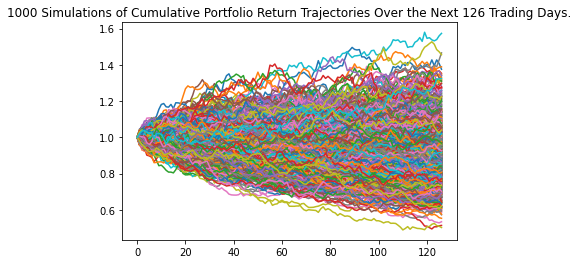

In [27]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_iwp_line_plot = MC_btc_iwp.plot_simulation()

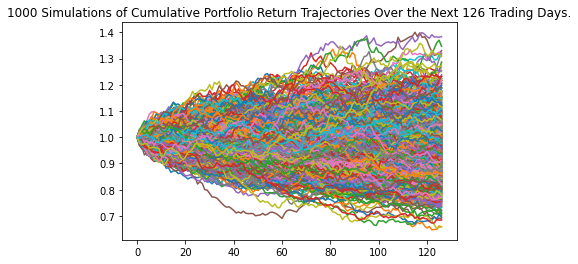

In [28]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_iws_line_plot = MC_btc_iws.plot_simulation()

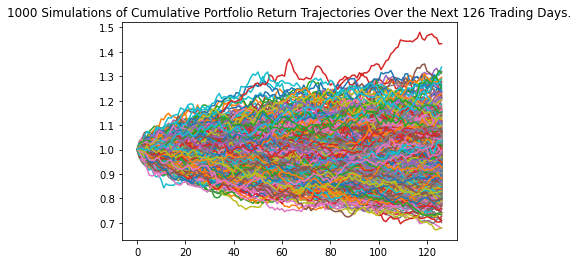

In [29]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_mgc_line_plot = MC_btc_mgc.plot_simulation()

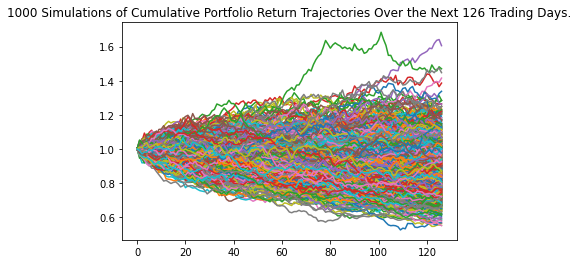

In [30]:
# Visualize the 6 mo. Monte Carlo simulation by creating an overlay line plot
btc_iwc_line_plot = MC_btc_iwc.plot_simulation()

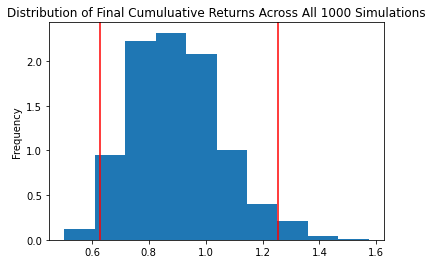

In [31]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_iwp_distribution_plot = MC_btc_iwp.plot_distribution()

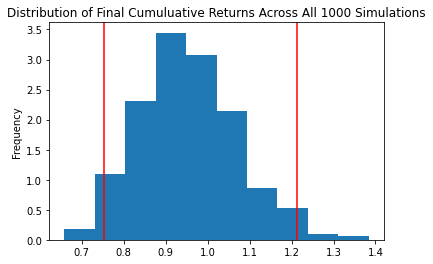

In [32]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_iws_distribution_plot = MC_btc_iws.plot_distribution()

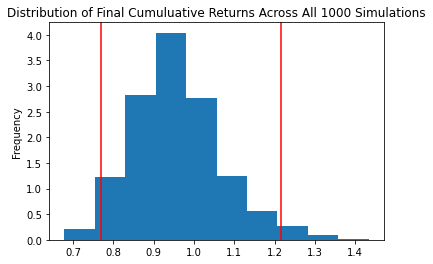

In [33]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_mgc_distribution_plot = MC_btc_mgc.plot_distribution()

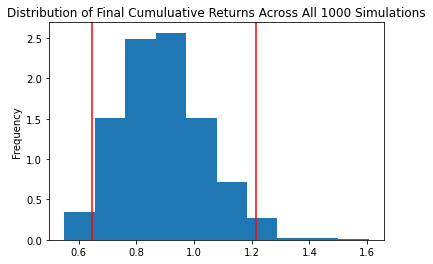

In [34]:
# Visualize the probability distribution of the 6 mo. Monte Carlo simulation 
btc_iwc_distribution_plot = MC_btc_iwc.plot_distribution()

In [35]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_iwp_table = MC_btc_iwp.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_iwp_table)

count           1000.000000
mean               0.899432
std                0.158366
min                0.502957
25%                0.779642
50%                0.887005
75%                0.997559
max                1.573118
95% CI Lower       0.630045
95% CI Upper       1.255278
Name: 126, dtype: float64


In [36]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_iws_table = MC_btc_iws.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_iws_table)

count           1000.000000
mean               0.953833
std                0.116468
min                0.658441
25%                0.873118
50%                0.946912
75%                1.025141
max                1.383870
95% CI Lower       0.752957
95% CI Upper       1.212769
Name: 126, dtype: float64


In [37]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_mgc_table = MC_btc_mgc.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_mgc_table)

count           1000.000000
mean               0.957139
std                0.110311
min                0.678700
25%                0.880709
50%                0.948035
75%                1.022683
max                1.433214
95% CI Lower       0.770545
95% CI Upper       1.214590
Name: 126, dtype: float64


In [38]:
# Generate summary statistics from the 6 mo. Monte Carlo simulation results
# Save the results as a variable
btc_iwc_table = MC_btc_iwc.summarize_cumulative_return()

# Review the 6 mo. Monte Carlo summary statistics
print(btc_iwc_table)

count           1000.000000
mean               0.889951
std                0.147892
min                0.550032
25%                0.781510
50%                0.879886
75%                0.981534
max                1.605490
95% CI Lower       0.645068
95% CI Upper       1.215653
Name: 126, dtype: float64


In [39]:
# Print the current balance of the stock and bond portion of the members portfolio
investment = 100000

In [40]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_iwp_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_iwp_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and IWP respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and IWP respectively over the next six months will end within the range of $63004.51 and $125527.77.


In [41]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_iws_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_iws_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and IWS respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and IWS respectively over the next six months will end within the range of $75295.75 and $121276.92.


In [42]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_mgc_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_mgc_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and MGC respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and MGC respectively over the next six months will end within the range of $77054.51 and $121459.02.


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = round(btc_iwc_table[8] * investment, 2)
ci_upper_cumulative_return = round(btc_iwc_table[9] * investment, 2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${investment} in a portfolio"
      f" with a 5/95 split between BTC and IWC respectively over the next six months will end within the range of"
      f" ${ci_lower_cumulative_return} and ${ci_upper_cumulative_return}.")

There is a 95% chance that an initial investment of $100000 in a portfolio with a 5/95 split between BTC and IWC respectively over the next six months will end within the range of $64506.76 and $121565.28.
